In [56]:
import pandas as pd
pd.options.mode.chained_assignment = None

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objs as go
from wordcloud import WordCloud
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

In [57]:
import sys
sys.path.insert(0, '../_functions_')

from functions_eda import *

In [58]:
babies = pd.read_csv('../Final Project/datasets/BD_Final Project - nascuts_vius_BCN.csv')

## Data cleaning and exploring

In [59]:
babies.info()
# the values are all integers, so this is what I need.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Year    49 non-null     int64
 1   Boys    49 non-null     int64
 2   Girls   49 non-null     int64
 3   Total   49 non-null     int64
dtypes: int64(4)
memory usage: 1.7 KB


In [60]:
babies.head()

,Year,Boys,Girls,Total
0,2023,5874,5504,11378
1,2022,6090,5511,11601
2,2021,6135,5840,11975
3,2020,6312,5967,12279
4,2019,6626,6273,12899


In [61]:
# Checking the shape of the dataframe
babies.shape

(49, 4)

In [62]:
# There aren't any NaN values
babies.isnull().sum()

Year     0
Boys     0
Girls    0
Total    0
dtype: int64

## 1 - First I want to see the evolution of babies born in Barcelona through the years. For that, I'm going to try different plots to see each one shows better the data.

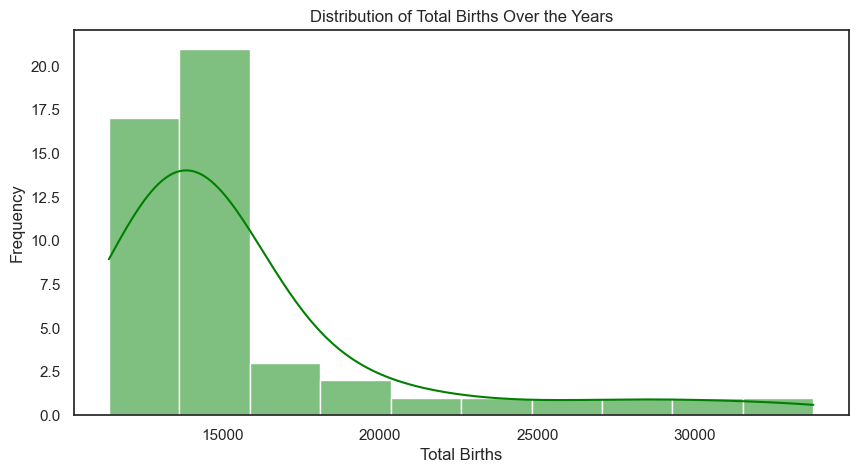

In [63]:
# Seaborn Histogram - this one won't work because I can't add the variable Year
plt.figure(figsize=(10,5))
sns.histplot(babies["Total"], bins=10, kde=True, color="green")
plt.xlabel("Total Births")
plt.ylabel("Frequency")
plt.title("Distribution of Total Births Over the Years")
plt.show()



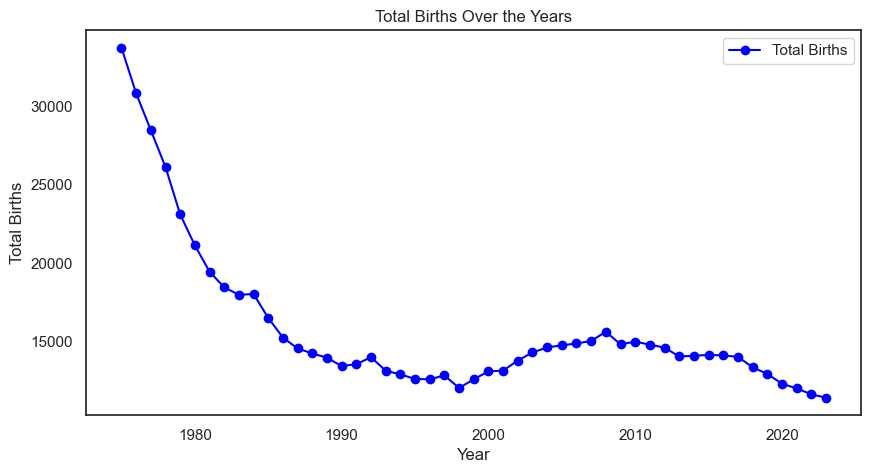

In [64]:
# Matplotlib Alternative (Line Plot)
plt.figure(figsize=(10,5))
plt.plot(babies["Year"], babies["Total"], marker="o", linestyle="-", color="blue", label="Total Births")
plt.xlabel("Year")
plt.ylabel("Total Births")
plt.title("Total Births Over the Years")
plt.legend()
plt.grid(False)
plt.show()

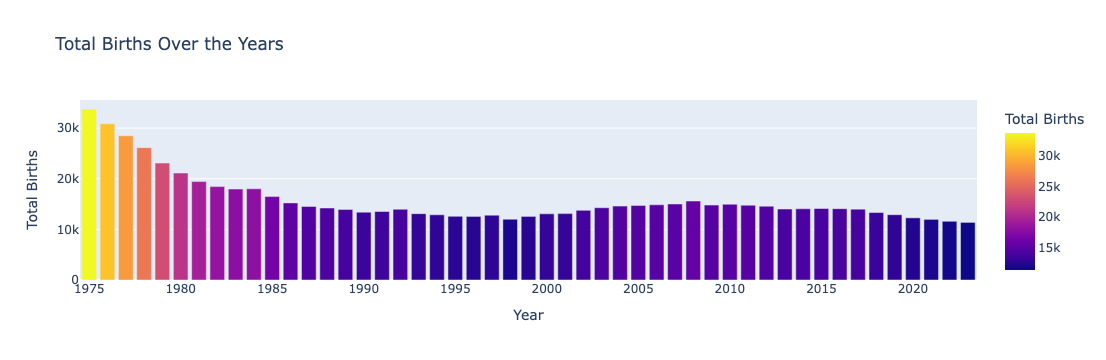

In [65]:
# Plotly Alternative (Interactive Bar Chart) - I'll use this one, maybe after I tuned it
fig = px.bar(babies, x="Year", y="Total", title="Total Births Over the Years", labels={"Total": "Total Births"}, color="Total")
fig.show()

## 2 - Second I'll present this data into more detail, just out of curiosity: boys vs girls 

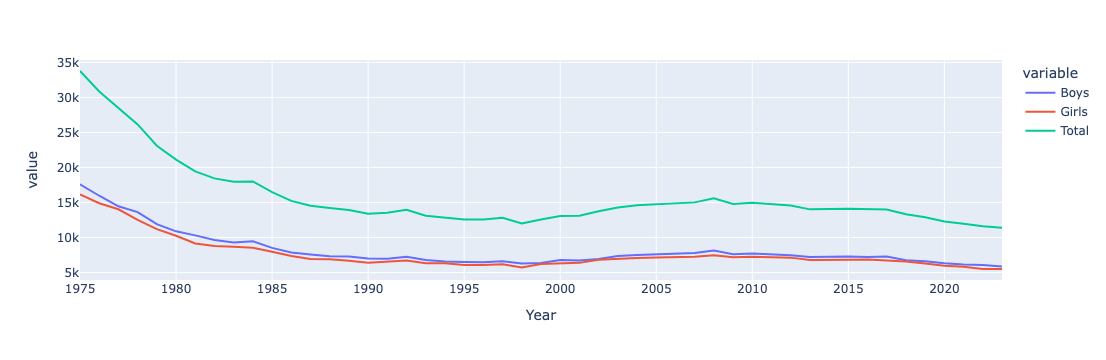

In [68]:
# With the total variable
# Step 1: Create the traces of the plots
fig = px.line(babies, x = "Year", y=["Boys", "Girls", 'Total'])

# Step 2: Show the plot
fig.show()

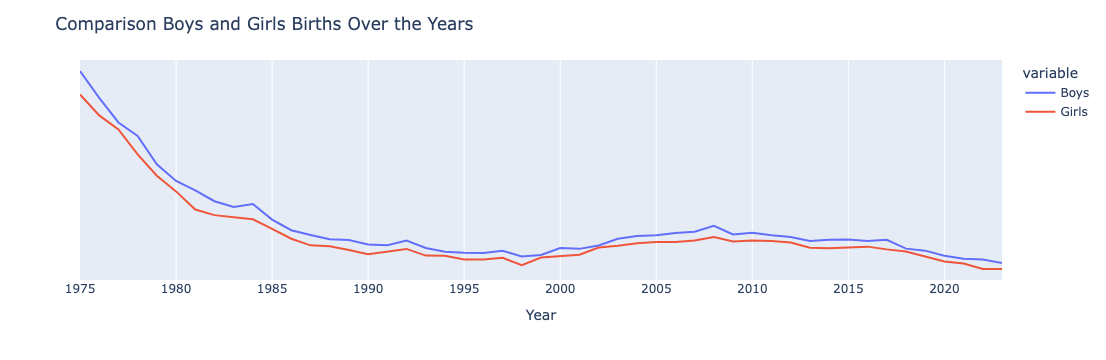

In [87]:
# Without the total variable
# Create the traces of the plots
fig = px.line(babies, x = "Year", y=["Boys", "Girls"])

# Update the layout of the plot with a title
fig.update_layout(title_text='Comparison Boys and Girls Births Over the Years')

# Hide and lock down axes
fig.update_yaxes(visible=False, fixedrange=True)

# Show the plot
fig.show()

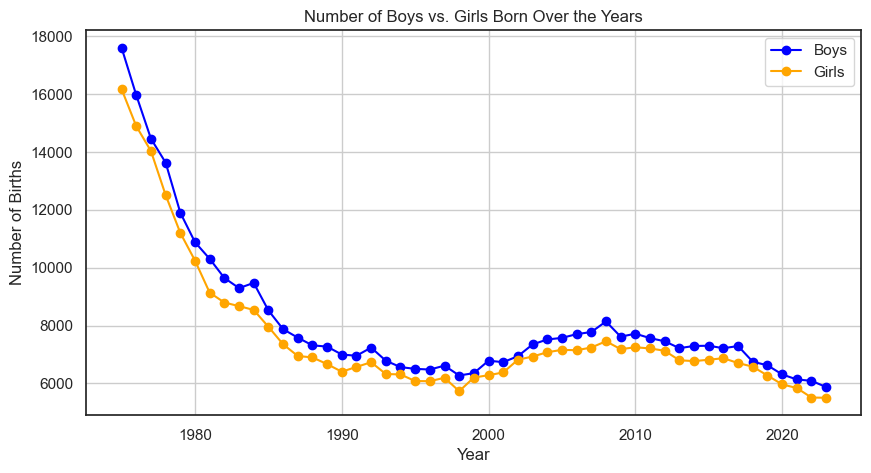

In [72]:
# Other options:
# Line Plot (Matplotlib)
plt.figure(figsize=(10,5))
plt.plot(babies["Year"], babies["Boys"], marker="o", linestyle="-", label="Boys", color="blue")
plt.plot(babies["Year"], babies["Girls"], marker="o", linestyle="-", label="Girls", color="orange")
plt.xlabel("Year")
plt.ylabel("Number of Births")
plt.title("Number of Boys vs. Girls Born Over the Years")
plt.legend()
plt.grid(True)
plt.show()

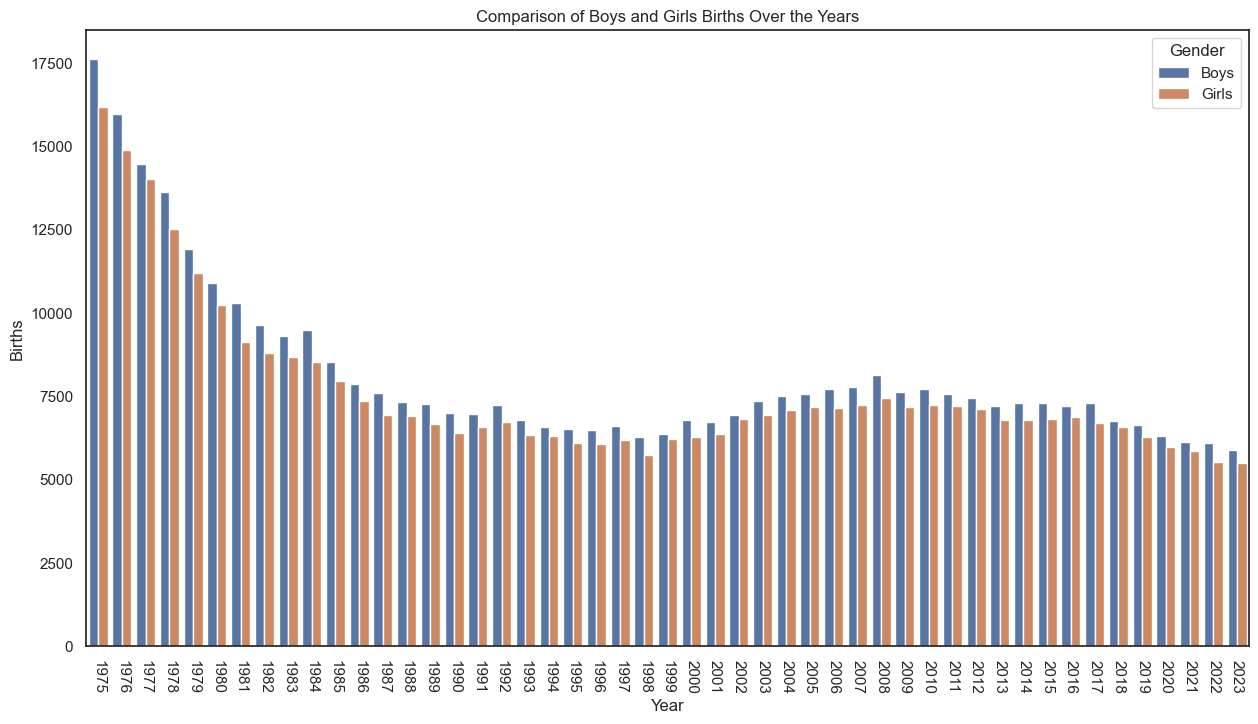

In [79]:
# Grouped Bar Chart (Seaborn)
plt.figure(figsize=(15,8))
b_melted = babies.melt(id_vars="Year", value_vars=["Boys", "Girls"], var_name="Gender", value_name="Births")
sns.barplot(x="Year", y="Births", hue="Gender", data=b_melted)
plt.title("Comparison of Boys and Girls Births Over the Years")
plt.xticks(rotation=-90)
plt.show()

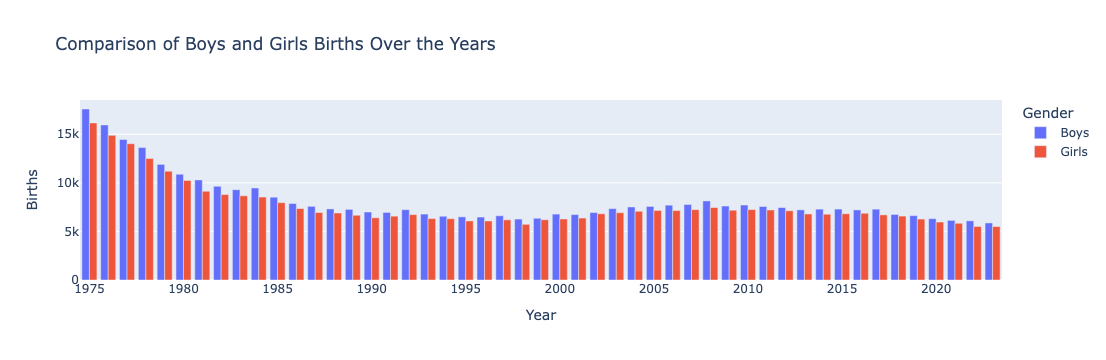

In [80]:
# Plotly Interactive Bar Chart
fig = px.bar(b_melted, x="Year", y="Births", color="Gender", barmode="group",
             title="Comparison of Boys and Girls Births Over the Years")
fig.show()